In [ ]:
#implementation of CIFAR10 Using TensorFlow and Keras Sequential API in Python
#import tensorflow 
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt

In [ ]:
#Download and preparethe CIFAR10 dataset
#The CIFAR10 dataset contains 60,000 color images in 10 classes with 6000 images in each class
#The dataset is divided into 50,000 training images and  10,000 testing images
(train_images,train_labels),(test_images,test_labels)=datasets.cifar10.load_data()

In [ ]:
train_images.shape

(50000, 32, 32, 3)

In [ ]:
train_images

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [ ]:
#Normalize pixel values to be  between 0 and 1
train_images,test_images=train_images/255.0,test_images/255.0

In [ ]:
train_images

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [ ]:
#To verify the data
#To verify how that the dataset looks let's plot the first 25 images
#From the training set and display the class name below each image
class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [ ]:
train_labels.shape

(50000, 1)

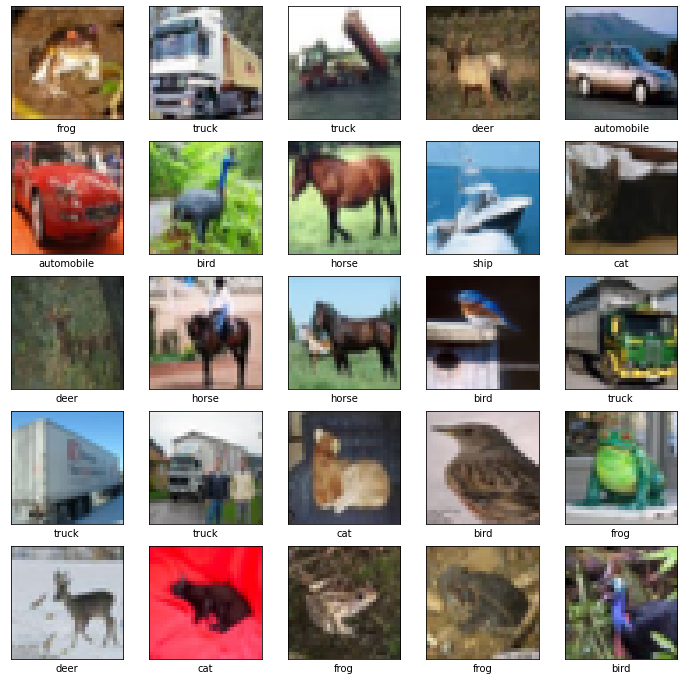

In [ ]:
plt.figure(figsize=(12,12))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i],cmap=plt.cm.binary)
  #The CIFAR labels happens to be arrays
  #Which is why we need extra index
  plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [ ]:
#Now wee need to train the model
#For that we need our neural network ready

In [ ]:
#Create the convolutional base
#An input,a CNN takes tensors of shape(image_height,image_width,color_channels)

In [ ]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

In [ ]:
#Lets display the architecture of our model so far
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 64)          0         
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
____________________________________________________

In [ ]:
#Adding dense layers on top
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))


In [ ]:
#Compile and train the model
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [ ]:
history=model.fit(train_images,train_labels,epochs=10,validation_data=(test_images,test_labels))

Epoch 1/10
1563/1563 [==============================] - 73s 47ms/step - loss: 1.5979 - accuracy: 0.4105 - val_loss: 1.3565 - val_accuracy: 0.5064
Epoch 2/10
1563/1563 [==============================] - 73s 47ms/step - loss: 1.2534 - accuracy: 0.5552 - val_loss: 1.1914 - val_accuracy: 0.5781
Epoch 3/10
1563/1563 [==============================] - 76s 49ms/step - loss: 1.1161 - accuracy: 0.6067 - val_loss: 1.0835 - val_accuracy: 0.6171
Epoch 4/10
1563/1563 [==============================] - 77s 50ms/step - loss: 1.0242 - accuracy: 0.6414 - val_loss: 1.0353 - val_accuracy: 0.6381
Epoch 5/10
1563/1563 [==============================] - 79s 50ms/step - loss: 0.9566 - accuracy: 0.6680 - val_loss: 0.9846 - val_accuracy: 0.6553
Epoch 6/10
1563/1563 [==============================] - 79s 51ms/step - loss: 0.8978 - accuracy: 0.6852 - val_loss: 1.0582 - val_accuracy: 0.6316
Epoch 7/10
1563/1563 [==============================] - 80s 51ms/step - loss: 0.8491 - accuracy: 0.7013 - val_loss: 0.9497 -

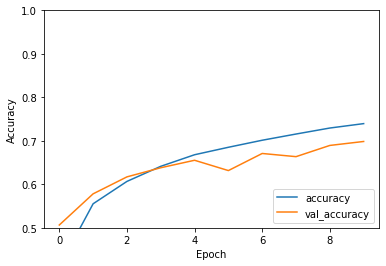

In [ ]:
#Evaluate the model
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

#Testing the accuracy
print(test_acc)

313/313 - 4s - loss: 0.8928 - accuracy: 0.6985
0.6984999775886536
